In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!ls excel

LPR_data-2017-06.xlsx LPR_data-2017-11.xlsx LPR_data-2018-04.xlsx
LPR_data-2017-07.xlsx LPR_data-2017-12.xlsx LPR_data-2018-05.xlsx
LPR_data-2017-08.xlsx LPR_data-2018-01.xlsx LPR_data-2018-06.xlsx
LPR_data-2017-09.xlsx LPR_data-2018-02.xlsx LPR_data-2018-07.xlsx
LPR_data-2017-10.xlsx LPR_data-2018-03.xlsx


In [3]:
import glob
excel_names =glob.glob("excel/LPR*.xlsx")

In [4]:
# filenames

excels = [pd.ExcelFile(name) for name in excel_names]

# turn them into dataframes
frames = [x.parse(x.sheet_names[0], header=None,index_col=None) for x in excels]

# delete the first row for all frames except the first
# i.e. remove the header row -- assumes it's the first
frames[1:] = [df[1:] for df in frames[1:]]

# concatenate them..
combined = pd.concat(frames)

# write it out
combined.to_csv("combined_data.csv", header=False, index=False)
combined.to_excel("combined.xlsx", header=False, index=False)

In [5]:
# Make a reference to the books.csv file path
csv_path = "combined_data.csv"

# Import the books.csv file as a DataFrame
original_df = pd.read_csv(csv_path, encoding="utf-8")
original_df.head()


,Metro,Dimension Type,Month,Dimension,Measure,Value,YoY
0,National,Quick Facts,2018-06,U.S. Median Pay,U.S. Median Pay,52052.0,0.016
1,Atlanta,Quick Facts,2018-06,Metro Median Pay,Metro Median Pay,53688.0,0.015
2,Atlanta,Quick Facts,2018-06,U.S. Median Pay,U.S. Median Pay,52052.0,0.016
3,Atlanta,Quick Facts,2018-06,Job Openings,Job Openings,133775.0,0.296
4,New York City,Quick Facts,2018-06,Metro Median Pay,Metro Median Pay,61741.0,0.022


In [6]:
glassdoor_df = original_df.rename(columns = {'Dimension Type': 'Dimension_type'})
glassdoor_df.head()

,Metro,Dimension_type,Month,Dimension,Measure,Value,YoY
0,National,Quick Facts,2018-06,U.S. Median Pay,U.S. Median Pay,52052.0,0.016
1,Atlanta,Quick Facts,2018-06,Metro Median Pay,Metro Median Pay,53688.0,0.015
2,Atlanta,Quick Facts,2018-06,U.S. Median Pay,U.S. Median Pay,52052.0,0.016
3,Atlanta,Quick Facts,2018-06,Job Openings,Job Openings,133775.0,0.296
4,New York City,Quick Facts,2018-06,Metro Median Pay,Metro Median Pay,61741.0,0.022


In [7]:
glassdoor_df.shape

(27947, 7)

In [8]:
glassdoor_df.dtypes

Metro              object
Dimension_type     object
Month              object
Dimension          object
Measure            object
Value             float64
YoY               float64
dtype: object

In [9]:
#Filter by Job Title = Data Analyst  & Data Scientist

filtered_df = glassdoor_df.query('Dimension_type == ["Job Title"]')
filtered_df = glassdoor_df[(glassdoor_df['Dimension']=='Data Analyst') | 
                           (glassdoor_df['Dimension']=='Data Scientist') |
                          (glassdoor_df['Dimension']=='Business Analyst')]
filtered_df.head()


,Metro,Dimension_type,Month,Dimension,Measure,Value,YoY
36,National,Job Title,2018-06,Business Analyst,Median Base Pay,65004.0,0.007
59,National,Job Title,2018-06,Data Scientist,Median Base Pay,94912.0,-0.002
61,National,Job Title,2018-06,Data Analyst,Median Base Pay,60374.0,0.019
120,Atlanta,Job Title,2018-06,Business Analyst,Median Base Pay,72012.0,0.007
143,Atlanta,Job Title,2018-06,Data Scientist,Median Base Pay,98512.0,-0.003


## Dataframe 1 - Median Salary Trend by Month

In [10]:
period_df = filtered_df[['Month','Dimension','Value']]
period_df.head()

,Month,Dimension,Value
36,2018-06,Business Analyst,65004.0
59,2018-06,Data Scientist,94912.0
61,2018-06,Data Analyst,60374.0
120,2018-06,Business Analyst,72012.0
143,2018-06,Data Scientist,98512.0


In [11]:
#Extra - Average Median Salary by Month
month_average = period_df.groupby(["Month"]).mean()['Value']
month_average

Month
2017-06    83545.055556
2017-07    84302.000000
2017-08    84742.121212
2017-09    84328.212121
2017-10    83873.181818
2017-11    83088.909091
2017-12    84191.363636
2018-01    83674.909091
2018-02    84815.787879
2018-03    85131.181818
2018-04    85125.303030
2018-05    84700.727273
2018-06    84605.060606
2018-07    85181.393939
Name: Value, dtype: float64

In [12]:
salary_by_title= pd.DataFrame(period_df.groupby(["Month","Dimension"]).mean()['Value'])
salary_by_title.head()


Value
Month   Dimension                      
2017-06 Business Analyst   73969.833333
        Data Analyst       68989.666667
        Data Scientist    107675.666667
2017-07 Business Analyst   74477.545455
        Data Analyst       69598.636364

In [13]:
title_df = salary_by_title.reset_index().set_index('Month')

In [14]:
title_df[['Data Analyst']] = title_df.groupby('Dimension').get_group('Data Analyst')[['Value']]
title_df[['Data Scientist']] = title_df.groupby('Dimension').get_group('Data Scientist')[['Value']]
title_df[['Business Analyst']] = title_df.groupby('Dimension').get_group('Business Analyst')[['Value']]

In [15]:
grouped_by_title = title_df[['Data Analyst', 'Data Scientist', 'Business Analyst']]

In [16]:
position_graph = grouped_by_title[~grouped_by_title.index.duplicated(keep='first')]

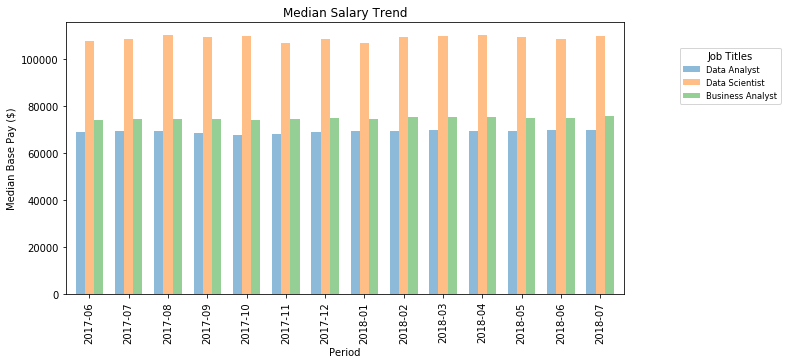

In [17]:
position_graph.plot(kind = 'bar',alpha=0.5, align='center', width = .7, figsize = (10,5))

plt.title("Median Salary Trend")
plt.xlabel("Period")
plt.ylabel("Median Base Pay ($)")

lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, 
                  loc=(1.1,.7), title="Job Titles", 
                  labelspacing=0.5)

margin = 0.05

plt.savefig('trend_by_period.png')

## Dataframe 2 - Median Salary Trend by Region

In [18]:
region_df = filtered_df[['Metro','Dimension','Value']]
region_df.head()

,Metro,Dimension,Value
36,National,Business Analyst,65004.0
59,National,Data Scientist,94912.0
61,National,Data Analyst,60374.0
120,Atlanta,Business Analyst,72012.0
143,Atlanta,Data Scientist,98512.0


In [19]:
salary_by_region= pd.DataFrame(region_df.groupby(["Metro","Dimension"]).mean()['Value'])
salary_by_region.head()

#region_average

Value
Metro   Dimension                     
Atlanta Business Analyst  71666.600000
        Data Analyst      65070.333333
        Data Scientist    96154.000000
Boston  Business Analyst  75578.071429
        Data Analyst      69902.571429

In [20]:
title_region_df = salary_by_region.reset_index().set_index('Metro')
#title_region_df

In [21]:
title_region_df[['Data Analyst']] = title_region_df.groupby('Dimension').get_group('Data Analyst')[['Value']]
title_region_df[['Data Scientist']] = title_region_df.groupby('Dimension').get_group('Data Scientist')[['Value']]

In [22]:
grouped_by_title2 = title_region_df[['Data Analyst', 'Data Scientist']]

In [23]:
region_graph = grouped_by_title2[~grouped_by_title2.index.duplicated(keep='first')]
region_graph

,Data Analyst,Data Scientist
Metro,,
Atlanta,65070.333333,96154.000000
Boston,69902.571429,109327.428571
Chicago,65282.857143,100557.571429
Houston,64070.285714,105633.571429
Los Angeles,71498.928571,115952.785714
National,59125.642857,95620.285714
New York City,71451.785714,113369.785714
Philadelphia,63029.071429,98255.642857
San Francisco,88754.357143,136822.000000


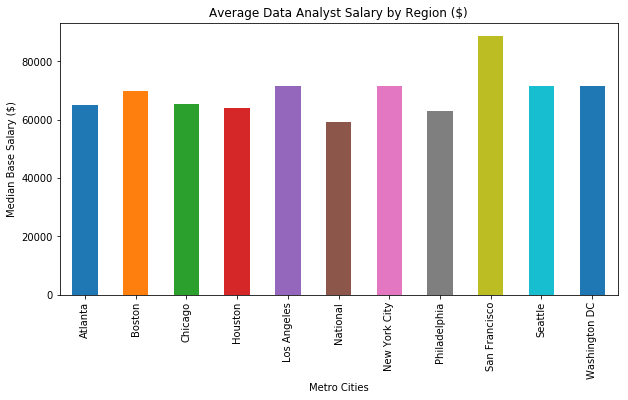

In [24]:
region_graph[['Data Analyst']].plot(kind='bar', y = 'Data Analyst', yticks = None,legend = False, 
                                    fontsize=10, figsize = (10,5))

plt.title("Average Data Analyst Salary by Region ($)")
plt.xlabel("Metro Cities")
plt.ylabel("Median Base Salary ($)")
#plt.grid(True)

plt.savefig('Data_Analyst_Cities.png')

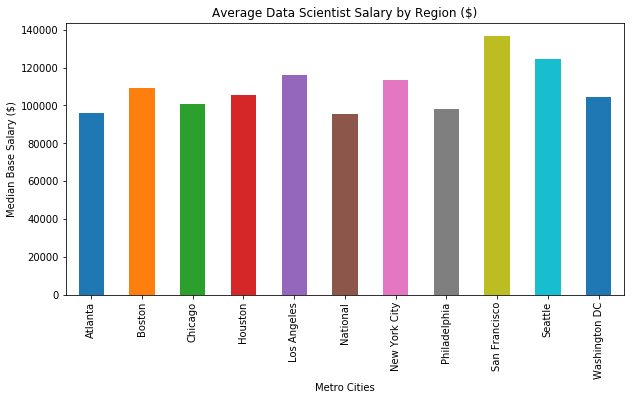

In [25]:
region_graph[['Data Scientist']].plot(kind='bar', y = 'Data Scientist', yticks = None,legend = False, 
                                      fontsize=10, figsize = (10,5))

plt.title("Average Data Scientist Salary by Region ($)")
plt.xlabel("Metro Cities")
plt.ylabel("Median Base Salary ($)")

plt.savefig('Data_Scientiest_Cities.png')